Enter any Ticker, For Indian Tickers Add Suffix wid .NS: NIFTYBEES.NS


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


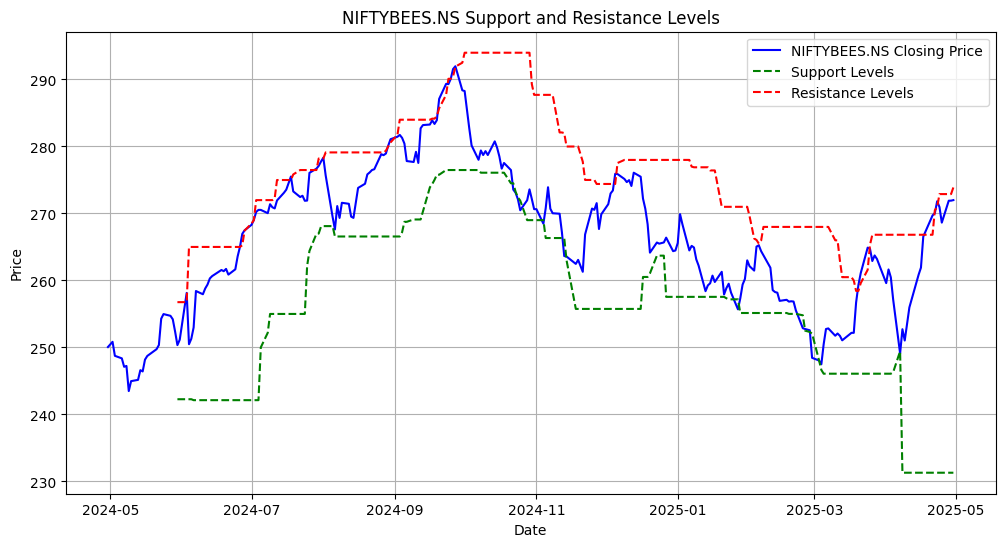


--- Support & Resistance Summary ---
Latest Close Price     : 271.99
Latest Support Level   : 231.30
Latest Resistance Level: 273.89
Interpretation         : 🔴 Near Resistance (Potential Selling Pressure)
📢 Breakout Status      : ✅ Price is within Support & Resistance range (No breakout detected)

--- RSI (14-day) Summary ---
Latest RSI Value       : 85.05
RSI Interpretation     : 🔴 RSI > 70 (Overbought — Possible correction)


<ipython-input-11-7f6c80ffc959>:227: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_support = float(support_levels.dropna().iloc[-1])
<ipython-input-11-7f6c80ffc959>:228: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_resistance = float(resistance_levels.dropna().iloc[-1])
<ipython-input-11-7f6c80ffc959>:229: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_close = float(aligned_close.iloc[-1])
<ipython-input-11-7f6c80ffc959>:259: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  latest_rsi = float(rsi_series.dropna().iloc[-1])


In [11]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Function to calculate support and resistance
def calculate_support_resistance(stock_symbol, lookback_period=20):
    # Download historical data for the stock
    data = yf.download(stock_symbol, period="1y", interval="1d")

    # Create lists to store support and resistance levels
    support_levels = []
    resistance_levels = []

    # Loop through the historical data
    for i in range(lookback_period, len(data)):
        # Get the current window of data
        window = data.iloc[i - lookback_period:i]

        # Find local minima (support) and local maxima (resistance) within the window
        local_min = window['Low'].min()
        local_max = window['High'].max()

        support_levels.append(local_min)
        resistance_levels.append(local_max)

    # Convert the levels into pandas Series for easy manipulation
    support_levels = pd.Series(support_levels, index=data.index[lookback_period:])
    resistance_levels = pd.Series(resistance_levels, index=data.index[lookback_period:])

    return data, support_levels, resistance_levels

# Function to plot the stock data along with support and resistance
def plot_support_resistance(data, stock_symbol, support_levels, resistance_levels):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label=f'{stock_symbol} Closing Price', color='blue')
    plt.plot(support_levels, label='Support Levels', color='green', linestyle='--')
    plt.plot(resistance_levels, label='Resistance Levels', color='red', linestyle='--')

    plt.title(f'{stock_symbol} Support and Resistance Levels')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Function to calculate RSI (14-day)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to print latest levels, interpretation and RSI
def print_support_resistance_summary(data, support_levels, resistance_levels, rsi_series):
    # Align Close price with support/resistance date range
    aligned_close = data['Close'].reindex(support_levels.index).dropna()

    # Ensure we have clean last values
    latest_support = float(support_levels.dropna().iloc[-1])
    latest_resistance = float(resistance_levels.dropna().iloc[-1])
    latest_close = float(aligned_close.iloc[-1])

    print(f"\n--- Support & Resistance Summary ---")
    print(f"Latest Close Price     : {latest_close:.2f}")
    print(f"Latest Support Level   : {latest_support:.2f}")
    print(f"Latest Resistance Level: {latest_resistance:.2f}")

    # Small buffer for proximity detection (2% of price)
    buffer = 0.02 * latest_close

    if abs(latest_close - latest_support) < buffer:
         interpretation = "🟢 Near Support (Potential Buying Opportunity)"
    elif abs(latest_close - latest_resistance) < buffer:
        interpretation = "🔴 Near Resistance (Potential Selling Pressure)"
    else:
        interpretation = "⚪ Price is between Support & Resistance (No immediate signal)"

    print(f"Interpretation         : {interpretation}")

    # Breakout/Breakdown Detection ()
    if latest_close > latest_resistance:
        breakout_status = "🚀 ALERT: Price broke ABOVE Resistance (Possible Bullish Breakout)"
    elif latest_close < latest_support:
        breakout_status = "⚠️ ALERT: Price broke BELOW Support (Possible Bearish Breakdown)"
    else:
        breakout_status = "✅ Price is within Support & Resistance range (No breakout detected)"

    print(f"📢 Breakout Status      : {breakout_status}")

    # --- RSI Section ---
    latest_rsi = float(rsi_series.dropna().iloc[-1])
    print(f"\n--- RSI (14-day) Summary ---")
    print(f"Latest RSI Value       : {latest_rsi:.2f}")

    if latest_rsi > 70:
        rsi_interpretation = "🔴 RSI > 70 (Overbought — Possible correction)"
    elif latest_rsi < 30:
        rsi_interpretation = "🟢 RSI < 30 (Oversold — Possible rebound)"
    else:
        rsi_interpretation = "⚪ RSI between 30-70 (Neutral momentum)"

    print(f"RSI Interpretation     : {rsi_interpretation}")

# --- Example usage ---
stock_symbol = input('Enter any Ticker, For Indian Tickers Add Suffix wid .NS: ')
data, support_levels, resistance_levels = calculate_support_resistance(stock_symbol)

# Calculate RSI
rsi_series = calculate_rsi(data)

# Introduce a delay to avoid hitting the rate limit
time.sleep(5)

# Plot the stock data with the calculated support and resistance levels
plot_support_resistance(data, stock_symbol, support_levels, resistance_levels)

# Print the latest levels, interpretation and RSI
print_support_resistance_summary(data, support_levels, resistance_levels, rsi_series)

